# Custom fitting routine

**We show how to use custom fitting routine, besides the default one provided.
Additionally, we compare the results of profile likelihood computations using the default fitting class and the custom fitting class.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from profile_likelihood import profile_likelihood

%matplotlib inline

## Define the model

The model is defined as the sum of trigonometric functions, in the form of
$$ f\left(t; \vec{\theta}\right) = \sin(\theta_0 t) + \cos(\theta_1 t), $$
where we sample at 3 time points $t = [1.0, 1.2, 2.0]^T$.
The default parameters are chosen to be $\vec{\theta} = [1, 2.5]^T$.
The data is set to be the predictions of the model at the default parameters and the standard deviation is chosen to be 30% of the data.
The implementation of this model is given in `model_trigonometric.py`.

In [2]:
import model_trigonometric as model
import manifold

# Define the variables from model
best_fit = model.best_fit
param_names = model.param_names
nparams = model.nparams
npred = model.npred

## Generate cost surface data

In [3]:
# Get cost contour data
Theta0, Theta1, Cost = manifold.cost_contour_data(
    model.cost,
    xlist=np.linspace(-5, 5, 100),
    ylist=np.linspace(-5, 5, 100),
)

## Use default `fit_leastsq`
This fitting class uses Levenberg-Marquardt algorithm from `scipy.optimize.leastsq`.
This algorithm requires the residuals of the model, instead of the cost function.

In [4]:
# Define the likelihood object
likelihood = profile_likelihood(model.residuals, nparams, npred)

In [5]:
results_lm = likelihood.compute(best_fit, bounds=[-5, 5])

## Use custom `fit_minimize`
The custom fitting class is given in `fit_minimize.py`.
 In this case, we specifically use `scipy.optimize.minimize` and setting `method="Nelder-Mead"`.
 Note that using this optimization routine, we need the cost function instead of the residuals.

In [6]:
# Define the likelihood object
likelihood = profile_likelihood(model.cost, nparams, npred)

In [7]:
import fit_minimize

# Use scipy.optimize.least_squares
fit_class = fit_minimize.fit(4, method="Nelder-Mead")

In [8]:
results_min = likelihood.compute(best_fit, bounds=[-5, 5], fit_class=fit_class)
results_min

OrderedDict([('parameter0',
              {'error_code': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
               'parameters': array([[-5.00000000e+00,  3.61761475e+00],
                      [-4.90000000e+00,  3.52685547e+00],
                      [-4.80000000e+00,  3.43450928e+00],
                      [-4.70000000e+00,  3.33850098e+00],
                      [-4.60000000e+00,  3.23309326e+00],
                      [-4.50000000e+00,  3.09753418e+00],
                      [-4.40000000e+00,  2.80780029e+00],


## Compare the results
The comparison is done by plotting the profile likelihood paths from the computation using the 2 fitting classes as well as plotting the cost curves.

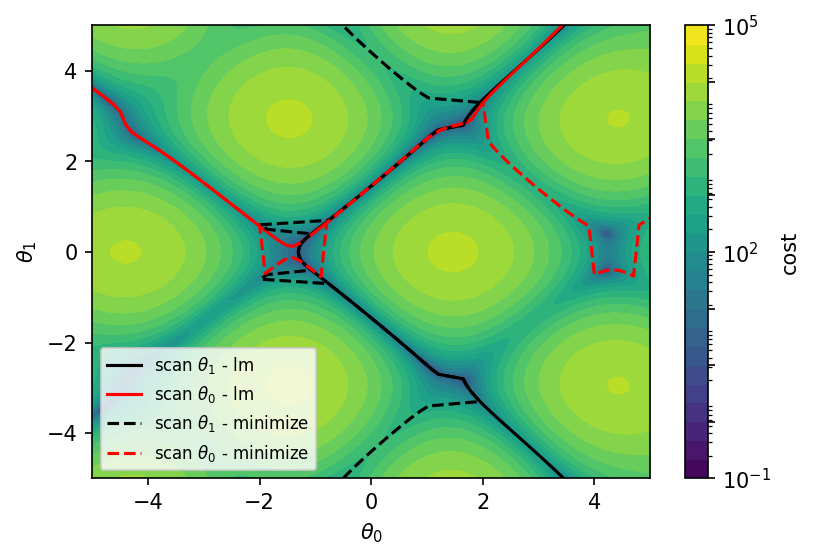

In [9]:
# Plot the paths
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(results_lm["parameter1"]["parameters"][:, 0], results_lm["parameter1"]["parameters"][:, 1],
         "k-", label=f"scan {param_names[1]} - lm")
ax.plot(results_lm["parameter0"]["parameters"][:, 0], results_lm["parameter0"]["parameters"][:, 1],
         "r-", label=f"scan {param_names[0]} - lm")
ax.plot(results_min["parameter1"]["parameters"][:, 0], results_min["parameter1"]["parameters"][:, 1],
         "k--", label=f"scan {param_names[1]} - minimize")
ax.plot(results_min["parameter0"]["parameters"][:, 0], results_min["parameter0"]["parameters"][:, 1],
         "r--", label=f"scan {param_names[0]} - minimize")
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label("cost")
plt.legend(fontsize=8)
plt.show()
plt.close()

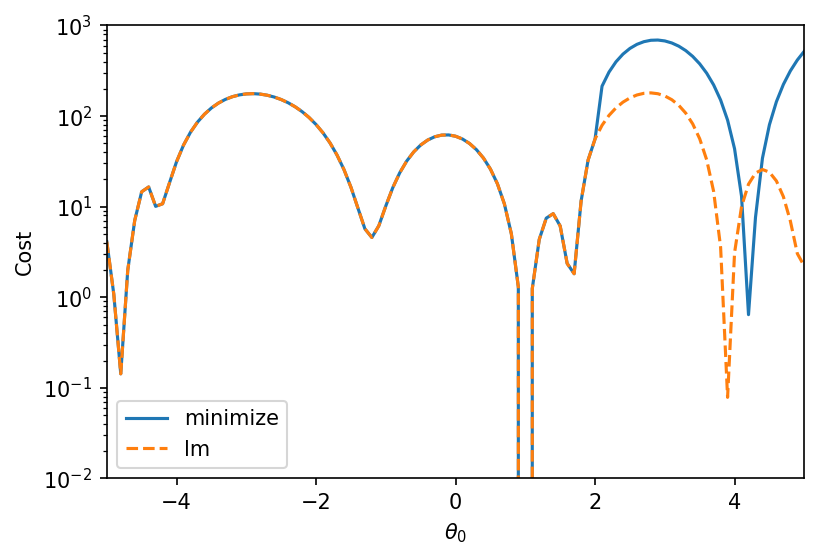

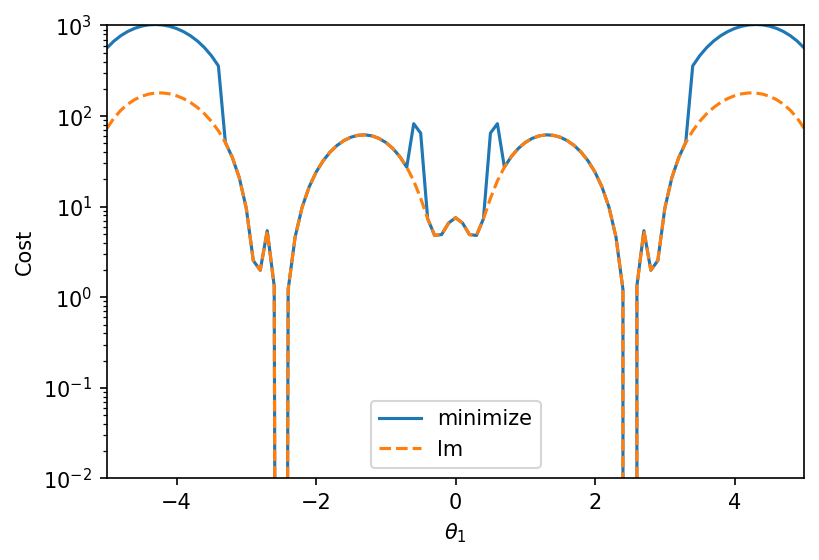

In [10]:
# Plot the negative profile log-likelihood
plt.figure(dpi=150, facecolor="w")
plt.plot(results_min["parameter0"]["parameters"][:, 0], results_min["parameter0"]["cost"], label="minimize")
plt.plot(results_lm["parameter0"]["parameters"][:, 0], results_lm["parameter0"]["cost"], "--", label="lm")
plt.yscale("log")
plt.xlim((-5, 5))
plt.ylim((1e-2, 1e3))
plt.xlabel(param_names[0])
plt.ylabel("Cost")
plt.legend()

plt.figure(dpi=150, facecolor="w")
plt.plot(results_min["parameter1"]["parameters"][:, 1], results_min["parameter1"]["cost"], label="minimize")
plt.plot(results_lm["parameter1"]["parameters"][:, 1], results_lm["parameter1"]["cost"], "--", label="lm")
plt.yscale("log")
plt.xlim((-5, 5))
plt.ylim(1e-2, 1e3)
plt.xlabel(param_names[1])
plt.ylabel("Cost")
plt.legend()

plt.show()
plt.close()